In [91]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score
import time

In [4]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [80]:
# Split training into 40,000 training and 10,000 validation
x_train, x_val = x_train[:40000], x_train[40000:]
y_train, y_val = y_train[:40000], y_train[40000:]

# Shuffle the training data using NumPy
indices = np.arange(x_train.shape[0])
np.random.shuffle(indices)
x_train = x_train[indices]
y_train = y_train[indices]

In [15]:
class LearningRateTracker(tf.keras.callbacks.Callback):
    def __init__(self):
        self.lr_history = []

    def on_batch_end(self, batch, logs=None):
        # Get the current learning rate from the schedule
        lr = self.model.optimizer.learning_rate
        self.lr_history.append(lr)

In [98]:
lr_schedule = tf.keras.optimizers.schedules.CosineDecayRestarts(
    initial_learning_rate=0.1,   # Set initial learning rate
    first_decay_steps=1000,        # Number of steps for the first restart
    t_mul=1.1,                       # Multiply the period after each restart
    m_mul=1,                       # Scaling factor for the learning rate
    alpha = 0.1
)

In [99]:
# Create a simple model (example with CIFAR-10 dataset)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model with SGD optimizer
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule),
              loss='sparse_categorical_crossentropy', #labels are integers
              metrics=['accuracy'])

In [ ]:
lr_tracker = LearningRateTracker()

start_time = time.time()

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks = [lr_tracker]
)

end_time = time.time()

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.2116 - loss: 2.1631
Epoch 2/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3611 - loss: 1.7740
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3586 - loss: 1.7751
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3936 - loss: 1.6927
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.3959 - loss: 1.6852
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4106 - loss: 1.6440
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4133 - loss: 1.6256
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4340 - loss: 1.5837
Epoch 9/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4157 - loss: 1.6284
Epoch 10/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4547 - loss: 1.5275
Epoch 11/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4118 - loss: 1.6483
Epoch 12/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4593 - loss: 1.5232
Epoch 13/20
540/625 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accurac

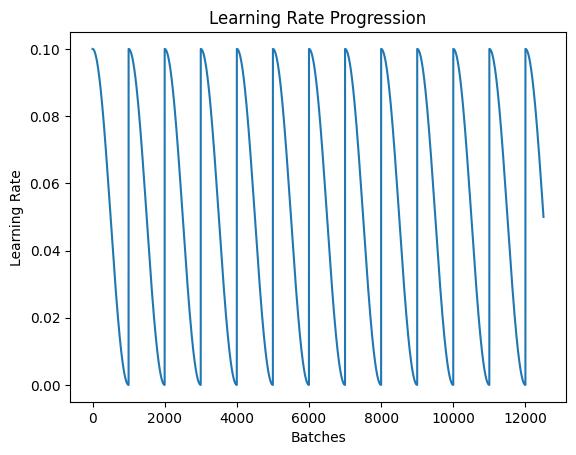

In [97]:
# Plot the learning rate history
plt.plot(lr_tracker.lr_history)
plt.title('Learning Rate Progression')
plt.xlabel('Batches')
plt.ylabel('Learning Rate')
plt.show()

In [93]:
import numpy as np


# Evaluate on test data

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

# Get predictions (class indices)
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=-1)

# Calculate precision for each class using scikit-learn
precision_per_class = precision_score(y_test, predicted_labels, average=None)
print(f"Precision per class: {precision_per_class}")

# Calculate recall for each class
recall_per_class = recall_score(y_test, predicted_labels, average=None)
print(f"Recall (Sensitivity) per class: {recall_per_class}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Precision per class: [0.55492639 0.50742574 0.39906832 0.35732984 0.3911368  0.40192539
 0.49200376 0.42703863 0.53054662 0.53304442]
Recall (Sensitivity) per class: [0.49  0.615 0.257 0.273 0.406 0.334 0.523 0.597 0.66  0.492]


Training time: 44.75881314277649 seconds


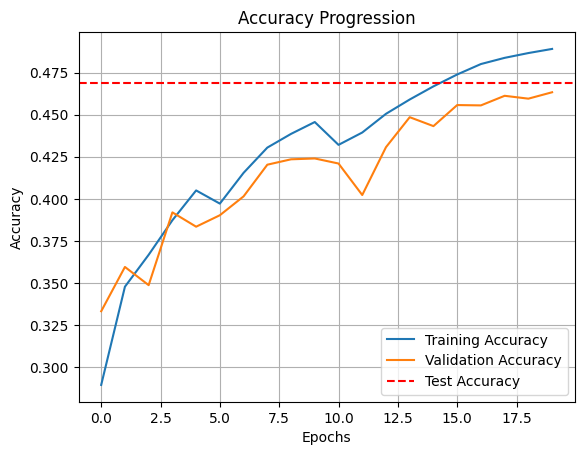

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


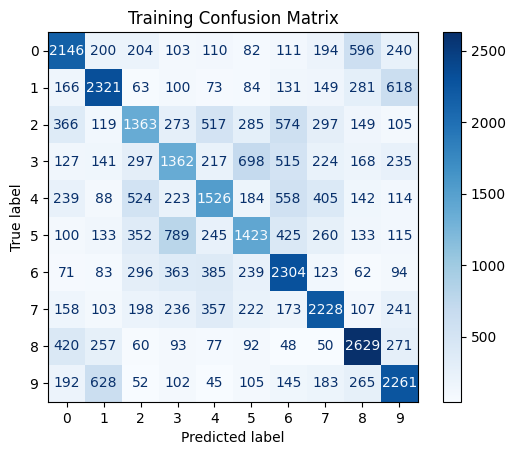

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


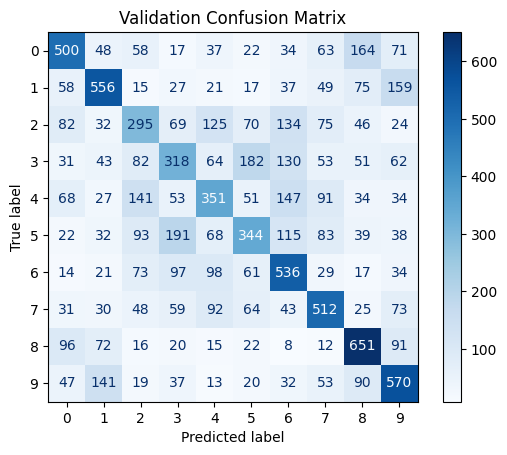

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


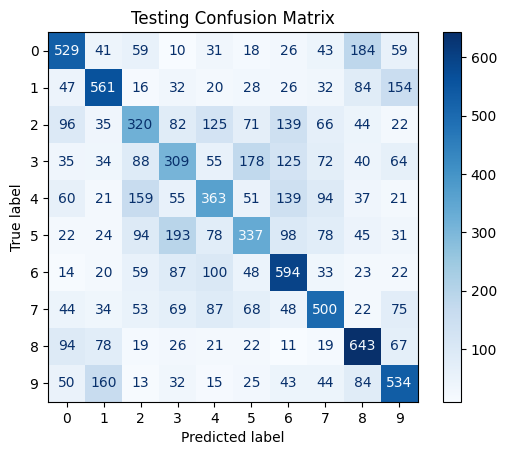

In [9]:
# Calculate the total training time
training_time = end_time - start_time
print(f"Training time: {training_time} seconds")

# Visualize training, validation, and test accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_acc, color='r', linestyle='--', label='Test Accuracy')
plt.title('Accuracy Progression (SGDR)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Helper function to plot confusion matrices
def plot_confusion_matrix(data, labels, dataset_name):
    predictions = model.predict(data, batch_size=64)
    predicted_classes = np.argmax(predictions, axis=1)
    cm = confusion_matrix(labels, predicted_classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'{dataset_name} Confusion Matrix')
    plt.show()

# Plot confusion matrices for training, validation, and testing
plot_confusion_matrix(x_train, y_train, '(SGDR) Training')
plot_confusion_matrix(x_val, y_val, '(SGDR) Validation')
plot_confusion_matrix(x_test, y_test, '(SGDR) Testing')